## PROBLEM STATEMENT

AA Pvt Ltd., has retail stores across the globe. They are struggling to generate revenue through their high end product sale. The company  has hired you as a data scientist to help them to design personalised offers for their customers based on their  purchase behaviour.

AA Pvt Ltd has collected demographic details of their customers like age, gender , marital status and city along with the total purchase amount in a month , to understand the purchase behaviour of high volume products.  

Agenda of the Industry Session : Impact of Feature Engineering on Model Performance

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style

import warnings
warnings.filterwarnings("ignore")

import os

## Importing Data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("C:/GL Class/Industry Session/23rd May 2021/Sales Data.csv")  

## Exploratory Data Analysis

In [3]:
## Total # of rows and columns/features
df.shape

(537577, 12)

In [4]:
# Check top few records to get a feel of the data structure
df.head()

customer_id   product_id sex age_group  job_code     city  \
0    653000653   AA12069042   F      0-17        10    Delhi   
1    653000653  AA120248942   F      0-17        10    Delhi   
2    653000653   AA12087842   F      0-17        10    Delhi   
3    653000653   AA12085442   F      0-17        10    Delhi   
4    653001306  AA120285442   M       55+        16  Chennai   

  living_in_current_city_since  married  product_category_1  \
0                            2        0                   3   
1                            2        0                   1   
2                            2        0                  12   
3                            2        0                  12   
4                           4+        0                   8   

   product_category_2  product_category_3  Total_Purchase_Amount  
0                 NaN                 NaN           11160.000000  
1                 6.0                14.0           20266.666670  
2                 NaN                 NaN            1896.000000  
3                14.0                 NaN            1409.333333  
4                 NaN                 NaN           10625.333330

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   537577 non-null  int64  
 1   product_id                    537577 non-null  object 
 2   sex                           537577 non-null  object 
 3   age_group                     537577 non-null  object 
 4   job_code                      537577 non-null  int64  
 5   city                          537577 non-null  object 
 6   living_in_current_city_since  537577 non-null  object 
 7   married                       537577 non-null  int64  
 8   product_category_1            537577 non-null  int64  
 9   product_category_2            370591 non-null  float64
 10  product_category_3            164278 non-null  float64
 11  Total_Purchase_Amount         537577 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory us

In [6]:
## product_category_2 and product_category_3 have null values
## Although count of null values is high, but before we decide to drop we should study these features considering we are looking 
## at a grocery store data and hence product category is an important feature.

## Checking for Duplicates

In [7]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [customer_id, product_id, sex, age_group, job_code, city, living_in_current_city_since, married, product_category_1, product_category_2, product_category_3, Total_Purchase_Amount]
Index: []

In [8]:
## There are no duplicates 

## Checking for unique Customers and Products

In [9]:
#Checking for unique values

print('The number of unique Customers are:',df["customer_id"].nunique())
print('The number of unique Products are:',df["product_id"].nunique())

The number of unique Customers are: 5891
The number of unique Products are: 3623


## Unique values of each categorical/object Feature

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PRODUCT_ID :  3623
AA120357542       1
AA120329842       1
AA120133042       1
AA120348142       1
AA120203942       1
               ... 
AA12057642     1430
AA120112142    1539
AA12025442     1586
AA120110742    1591
AA120265242    1858
Name: product_id, Length: 3623, dtype: int64


SEX :  2
F    132197
M    405380
Name: sex, dtype: int64


AGE_GROUP :  7
0-17      14707
55+       20903
51-55     37618
46-50     44526
18-25     97634
36-45    107499
26-35    214690
Name: age_group, dtype: int64


CITY :  3
Delhi      144638
Chennai    166446
Mumbai     226493
Name: city, dtype: int64


LIVING_IN_CURRENT_CITY_SINCE :  5
0      72725
4+     82889
3      93312
2      99459
1     189192
Name: living_in_current_city_since, dtype: int64




In [11]:
## 2 Cities, 7 Age Groups, 6 levels for living duration in a city

## Distribution of Age Group according to Gender

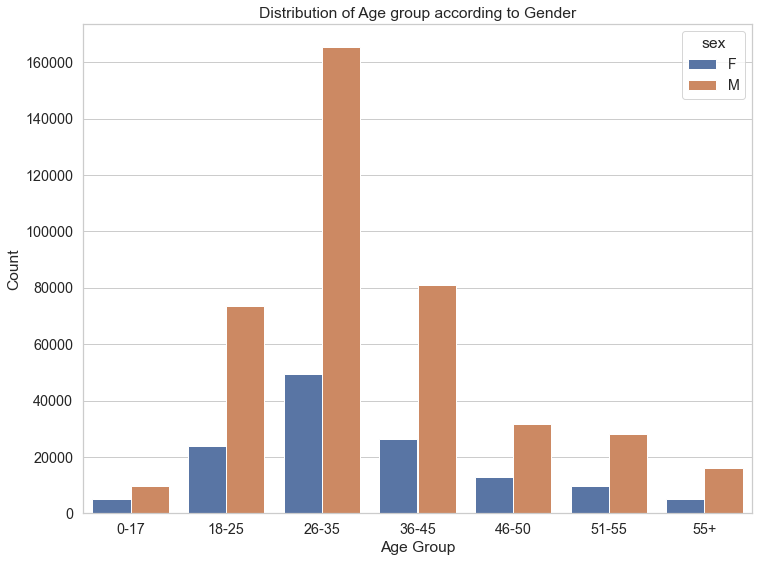

In [12]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.3)
ax = sns.countplot('age_group', hue = 'sex',data = df, order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']);
ax.set(title = "Distribution of Age group according to Gender", xlabel = "Age Group", ylabel = "Count");

In [13]:
## Count of Male is higher across all age groups
## Most of the data points are pertiaining to Age Group 26-35


## Is Average Purchase amount is also higher for Males ??

In [14]:
malesPurchaserData = df.loc[df['sex'] == 'M']
malesPurchaseMean = np.mean(malesPurchaserData['Total_Purchase_Amount'])
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = df.loc[df['sex'] == 'F']
femalsPurchaseMean = np.mean(femalsPurchaserData['Total_Purchase_Amount'])
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  12673.02895061044
Purchase mean for femal purchasers =  11746.348464792914


In [15]:
## Yes Average Purchase amount is higher for male

## Does Average purchase amount is different across different age groups


In [16]:
# Does mean purchage amount is different across different age groups

df[['age_group', 'Total_Purchase_Amount']].groupby('age_group').mean()

Total_Purchase_Amount
age_group                       
0-17                12026.835838
18-25               12313.596766
26-35               12419.451960
36-45               12535.305011
46-50               12379.829702
51-55               12827.488826
55+                 12605.198106

## Does Average purchage amount is different across job code

In [17]:
# Does mean purchage amount is different across job code

df[['job_code', 'Total_Purchase_Amount']].groupby('job_code').mean()

Total_Purchase_Amount
job_code                       
0                  12249.262302
1                  12023.604127
2                  12034.585310
3                  12317.436370
4                  12372.035656
5                  12518.465304
6                  12448.504826
7                  12669.567035
8                  12768.678040
9                  11619.114578
10                 12070.448546
11                 12399.289587
12                 13177.403280
13                 12565.932521
14                 12758.048567
15                 13154.986567
16                 12609.510824
17                 13208.505330
18                 12311.561890
19                 11672.332216
20                 11841.466018

## Does Average purchage amount is different for married customers

In [18]:
df[['married', 'Total_Purchase_Amount']].groupby('married').mean()

Total_Purchase_Amount
married                       
0                 12444.433956
1                 12446.176908

## Prpduct preference based on Gender - For Product Category 1

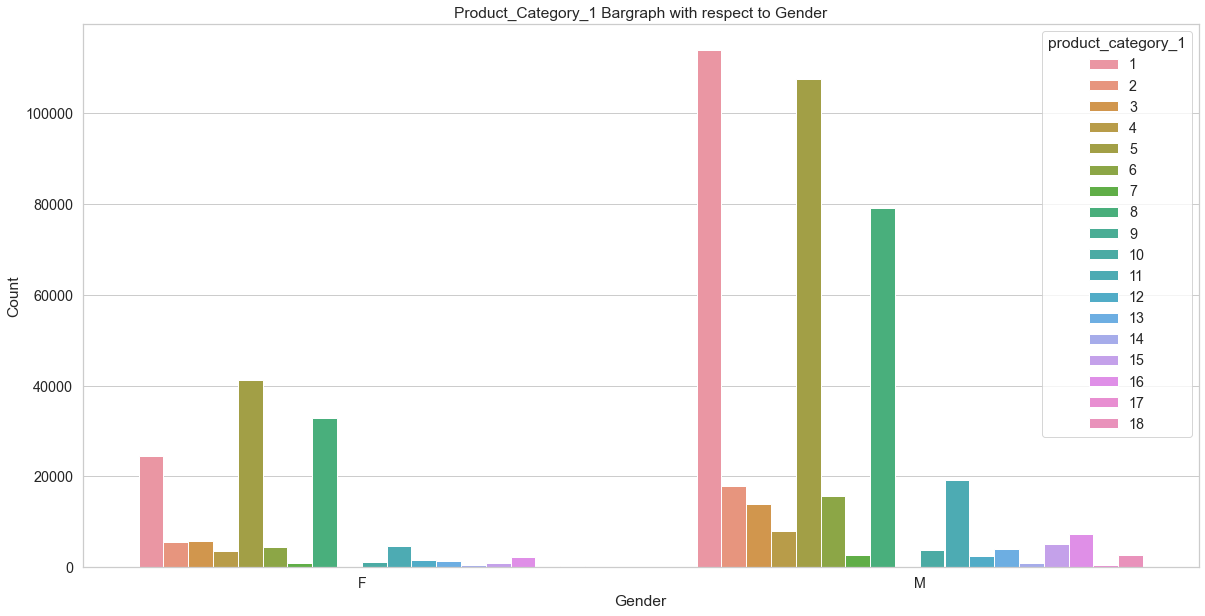

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.countplot('sex', hue = 'product_category_1', data = df);
ax.set(title = "Product_Category_1 Bargraph with respect to Gender", xlabel = "Gender", ylabel = "Count");

In [20]:
## High transaction count is observed for product_cateogory_1 =  1, 5 and 8 across all genders
## For Female, count is highest Product Category 5 whereas for Male count is highest for product_cateogory_1 = 1

## Distribution of All Product Categories

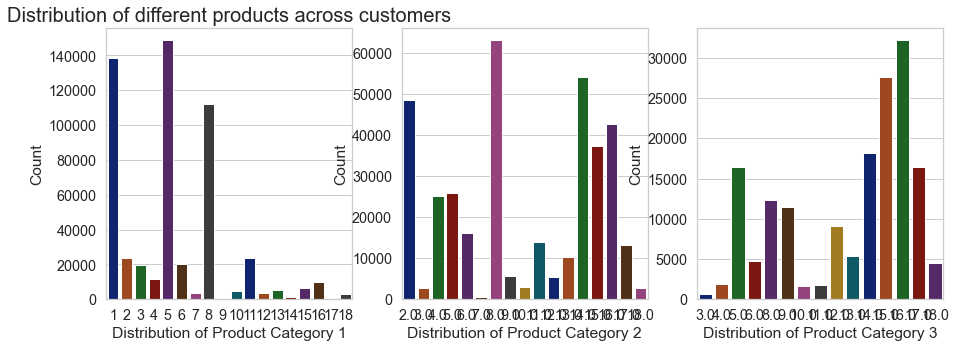

In [21]:

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(df['product_category_1'], palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(df['product_category_2'], palette = 'dark')

plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(df['product_category_3'], palette = 'dark')
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

## Pre-Processing

In [22]:
## Handling missing values

In [23]:
# Most Used product according to the age group in the given data

prod_2 = df.groupby('age_group')['product_category_2'].agg(lambda x:x.value_counts().index[0])
prod_2 = dict(prod_2)
print (prod_2)

prod_3 = df.groupby('age_group')['product_category_3'].agg(lambda x:x.value_counts().index[0])
prod_3 = dict(prod_3)
print (prod_3)

{'0-17': 4.0, '18-25': 8.0, '26-35': 8.0, '36-45': 8.0, '46-50': 8.0, '51-55': 8.0, '55+': 8.0}
{'0-17': 16.0, '18-25': 16.0, '26-35': 16.0, '36-45': 16.0, '46-50': 16.0, '51-55': 16.0, '55+': 16.0}


---  Filling the null values of the product category 2, could be done based on the values identified above, for this session, fillna is used 
for i in range(len(df)):
    if np.isnan(df.iloc[i, 9]) == True:
        key = df.iloc[i, 3]
        df.iloc[i, 9] = prod_2[key]

In [24]:
# Since the most used product in product category 3 for all age group is 16.0 , using fillna for imputation

df.product_category_3.fillna (value = 16.0, inplace = True)

# Since the most used product in product category 2 for all age group is 8.0 , except for one, using fillna for this feature as well
df.product_category_2.fillna (value = 8.0, inplace = True)
        
df['product_category_2'] = df['product_category_2'].astype(int)
df['product_category_3'] = df['product_category_3'].astype(int)

print ("Null values present : ")
df.isna().sum(axis = 0)

Null values present : 


customer_id                     0
product_id                      0
sex                             0
age_group                       0
job_code                        0
city                            0
living_in_current_city_since    0
married                         0
product_category_1              0
product_category_2              0
product_category_3              0
Total_Purchase_Amount           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   537577 non-null  int64  
 1   product_id                    537577 non-null  object 
 2   sex                           537577 non-null  object 
 3   age_group                     537577 non-null  object 
 4   job_code                      537577 non-null  int64  
 5   city                          537577 non-null  object 
 6   living_in_current_city_since  537577 non-null  object 
 7   married                       537577 non-null  int64  
 8   product_category_1            537577 non-null  int64  
 9   product_category_2            537577 non-null  int32  
 10  product_category_3            537577 non-null  int32  
 11  Total_Purchase_Amount         537577 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(5)

## Feature Engineering 

## Step 1 - Encoding of Features

In [26]:
## Ordinal Encoding for age_group feature

age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '56+ ': 5, '50-55':6}
df["age_group"] =df["age_group"].apply(lambda x: age_dict[x])

In [27]:
#Turn sex binary
sex_dict = {"F":0, "M":1}
df["sex"] = df["sex"].apply(lambda line: sex_dict[line])
df["sex"].value_counts()

1    405380
0    132197
Name: sex, dtype: int64

In [28]:
## Encoding based on total count of values under each label category
city_dict = {"Delhi":0, "Chennai":1, "Mumbai":2}
df["city"] = df["city"].apply(lambda line: city_dict[line])


In [29]:
## using label encoder for 'living_in_current_city_since' and 'sex'
## converting customer_id and product_id as string so that they are not considered as numeric just because these features have values as numbers

In [30]:
from sklearn.preprocessing import LabelEncoder

df['customer_id']= df['customer_id'].astype(str)
df['product_id']= df['product_id'].astype(str)

columns_list = ["customer_id", "product_id",'living_in_current_city_since', 'sex']
for var in columns_list:
    LE = LabelEncoder()
    df[var] = LE.fit_transform( df[var])

df['customer_id']= df['customer_id'].astype(str)
df['product_id']= df['product_id'].astype(str)

In [31]:
    
#Dummy Variables:
df = pd.get_dummies(df, columns=['living_in_current_city_since'], drop_first=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     537577 non-null  object 
 1   product_id                      537577 non-null  object 
 2   sex                             537577 non-null  int64  
 3   age_group                       537577 non-null  int64  
 4   job_code                        537577 non-null  int64  
 5   city                            537577 non-null  int64  
 6   married                         537577 non-null  int64  
 7   product_category_1              537577 non-null  int64  
 8   product_category_2              537577 non-null  int32  
 9   product_category_3              537577 non-null  int32  
 10  Total_Purchase_Amount           537577 non-null  float64
 11  living_in_current_city_since_1  537577 non-null  uint8  
 12  living_in_curren

In [33]:
## Train Test Split

In [34]:
# Copy all the predictor variables into X dataframe
X = df.drop('Total_Purchase_Amount', axis=1)

# Copy target into the y dataframe. 
y = df[['Total_Purchase_Amount']]

In [35]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
Decision_model = DecisionTreeRegressor()
Decision_model.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)


RMSE Error: 5040.756611010093
R2 Score: 0.4220134772928551


In [39]:
importance = Decision_model.feature_importances_
importance

array([0.11570507, 0.08661324, 0.00890653, 0.02939766, 0.04904134,
       0.01190184, 0.01117013, 0.62837632, 0.01399828, 0.01012748,
       0.0099608 , 0.00838361, 0.00864366, 0.00777403])

<AxesSubplot:>

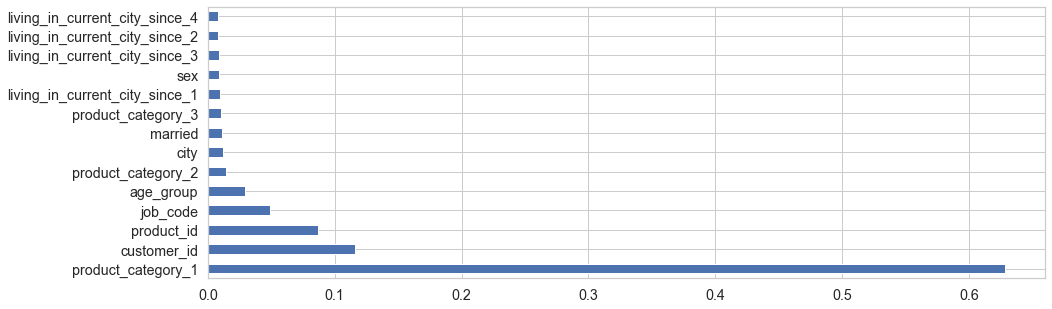

In [40]:
(pd.Series(importance, index=X.columns)
   .nlargest(15)
   .plot(kind='barh'))  

In [41]:
## Product Category 1 is the most significant feature.. New features should be generated for this feature to understand the impact on model performance

In [42]:
## Before generation of new features.. Let's build another model using advanced algorithms like gradient boosting.. To see 
## how boosting has helped to improve the performance 

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3742.196105625423
R2 Score: 0.6814487306229982


In [45]:
## This model is better than the Decision Tree Regressor..

## We should try to use some other algorithms like linear regression including regularisation technique to compare the model performance
## before generation of any new feature

## Step 2 - New Features

In [46]:
## We could apply the Feature enginnering on the original data set and then split it into train and test
## However for the session to ensure that performance is being measured on the same set of rows , feature engiinering is applied in the train 
## and then the same object is used to do a fit on the test split data frame

In [47]:
## Full Test and Train

full_train_data = X_train.copy()
full_train_data['Total_Purchase_Amount']= y_train

full_test_data = X_test.copy()
full_test_data['Total_Purchase_Amount']= y_test

In [48]:
## As we have multiple records for a customer id.. let's calculate the mean value for each customer and include that as a feature
## Similarly mean value of the total purchase amount based on each product id

In [49]:
X_train["customer_id_MeanPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('mean')
userID_mean_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].mean().to_dict()
X_test['customer_id_MeanPrice'] = full_test_data['customer_id'].apply(lambda x:userID_mean_dict.get(x,0))

X_train["product_id_MeanPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('mean')
productID_mean_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].mean().to_dict()
X_test['product_id_MeanPrice'] = full_test_data['product_id'].apply(lambda x:productID_mean_dict.get(x,0))

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     403182 non-null  object 
 1   product_id                      403182 non-null  object 
 2   sex                             403182 non-null  int64  
 3   age_group                       403182 non-null  int64  
 4   job_code                        403182 non-null  int64  
 5   city                            403182 non-null  int64  
 6   married                         403182 non-null  int64  
 7   product_category_1              403182 non-null  int64  
 8   product_category_2              403182 non-null  int32  
 9   product_category_3              403182 non-null  int32  
 10  living_in_current_city_since_1  403182 non-null  uint8  
 11  living_in_current_city_since_2  403182 non-null  uint8  
 12  living_in_c

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     134395 non-null  object 
 1   product_id                      134395 non-null  object 
 2   sex                             134395 non-null  int64  
 3   age_group                       134395 non-null  int64  
 4   job_code                        134395 non-null  int64  
 5   city                            134395 non-null  int64  
 6   married                         134395 non-null  int64  
 7   product_category_1              134395 non-null  int64  
 8   product_category_2              134395 non-null  int32  
 9   product_category_3              134395 non-null  int32  
 10  living_in_current_city_since_1  134395 non-null  uint8  
 11  living_in_current_city_since_2  134395 non-null  uint8  
 12  living_in_cu

In [52]:
Decision_model_2 = DecisionTreeRegressor()
Decision_model_2.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_2.predict(X_test)


In [53]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 4763.004776946169
R2 Score: 0.4839541507444465


In [54]:
importance = Decision_model_2.feature_importances_
importance

array([0.04269468, 0.03496687, 0.00366011, 0.01440962, 0.02150015,
       0.00827817, 0.00495498, 0.00951632, 0.01475397, 0.00939437,
       0.00463682, 0.00390341, 0.00371361, 0.00354349, 0.06882578,
       0.75124765])

<AxesSubplot:>

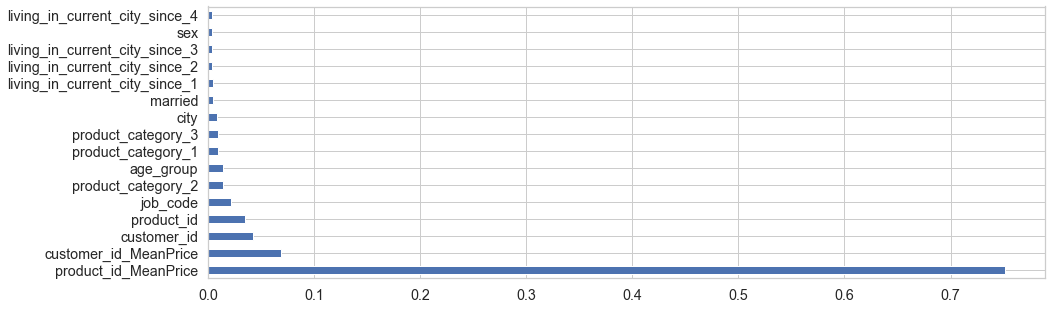

In [55]:
(pd.Series(importance, index=X_train.columns)
   .nlargest(16)
   .plot(kind='barh'))  

In [56]:
## Both the new created featues are significant..R2 and RMSE has improved in comparison to earlier model


In [57]:
## Let's create features with max and min value of the total purchase amount grouped by customer id and product id as 
## the earlier created features were significant

In [58]:
X_train["customer_id_MaxPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('max')
userID_max_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].max().to_dict()
X_test['customer_id_MaxPrice'] = full_test_data['customer_id'].apply(lambda x:userID_max_dict.get(x,0))

X_train["customer_id_MinPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('min')
userID_min_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].min().to_dict()
X_test['customer_id_MinPrice'] = full_test_data['customer_id'].apply(lambda x:userID_min_dict.get(x,0))

X_train["product_id_MaxPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('max') 
productID_max_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].max().to_dict() 
X_test['product_id_MaxPrice'] = full_test_data['product_id'].apply(lambda x:productID_max_dict.get(x,0))

X_train["product_id_MinPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('min')
productID_min_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].min().to_dict()
X_test['product_id_MinPrice'] = full_test_data['product_id'].apply(lambda x:productID_min_dict.get(x,0))

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     403182 non-null  object 
 1   product_id                      403182 non-null  object 
 2   sex                             403182 non-null  int64  
 3   age_group                       403182 non-null  int64  
 4   job_code                        403182 non-null  int64  
 5   city                            403182 non-null  int64  
 6   married                         403182 non-null  int64  
 7   product_category_1              403182 non-null  int64  
 8   product_category_2              403182 non-null  int32  
 9   product_category_3              403182 non-null  int32  
 10  living_in_current_city_since_1  403182 non-null  uint8  
 11  living_in_current_city_since_2  403182 non-null  uint8  
 12  living_in_c

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     134395 non-null  object 
 1   product_id                      134395 non-null  object 
 2   sex                             134395 non-null  int64  
 3   age_group                       134395 non-null  int64  
 4   job_code                        134395 non-null  int64  
 5   city                            134395 non-null  int64  
 6   married                         134395 non-null  int64  
 7   product_category_1              134395 non-null  int64  
 8   product_category_2              134395 non-null  int32  
 9   product_category_3              134395 non-null  int32  
 10  living_in_current_city_since_1  134395 non-null  uint8  
 11  living_in_current_city_since_2  134395 non-null  uint8  
 12  living_in_cu

In [61]:
Decision_model_3 = DecisionTreeRegressor()
Decision_model_3.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_3.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_3.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 4755.378650519359
R2 Score: 0.48560532706299797


<AxesSubplot:>

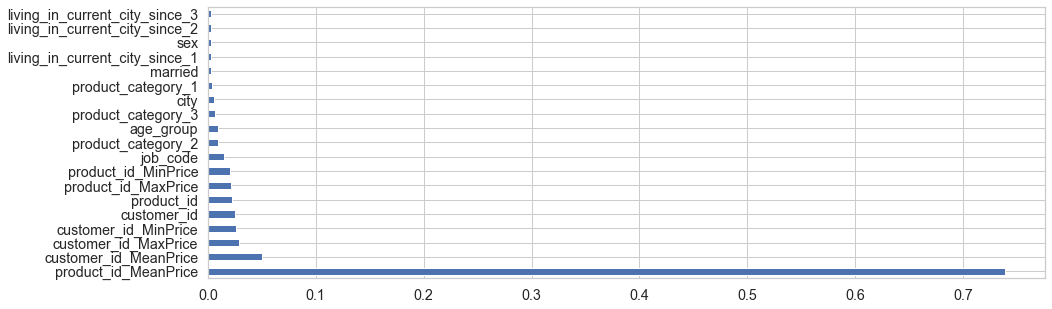

In [63]:
importance = Decision_model_3.feature_importances_
importance
(pd.Series(importance, index=X_train.columns)
   .nlargest(19)
   .plot(kind='barh'))  

In [64]:
## Marginal improvement in R2 and RMSE.. Newly created features are significant

In [65]:
## As Product Category 1 was the most significant feature in the orginal dataset, lets create new feature using max, min and mean value for Total pourchase amount
## For all categorical features, count is done for each level/category and the same is added as a new feature

In [66]:
X_train["Product_Cat1_MaxPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('max')
pc1_max_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].max().to_dict() 
X_test['Product_Cat1_MaxPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_max_dict.get(x,0))

X_train["Product_Cat1_MinPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('min') 
pc1_min_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].min().to_dict() 
X_test['Product_Cat1_MinPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_min_dict.get(x,0))

X_train["Product_Cat1_MeanPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('mean') 
pc1_mean_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].mean().to_dict() 
X_test['Product_Cat1_MeanPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_mean_dict.get(x,0))


X_train["customer_id_Count"] = full_train_data.groupby(['customer_id'])['customer_id'].transform('count')
customerid_count_dict = full_train_data.groupby(['customer_id']).size().to_dict()
X_test[' customer_id_Count'] = full_test_data['customer_id'].apply(lambda x:customerid_count_dict.get(x,0))
 
X_train["Product_ID_Count"] = full_train_data.groupby(['product_id'])['product_id'].transform('count')
productID_count_dict = full_train_data.groupby(['product_id']).size().to_dict()
X_test['Product_ID_Count'] = full_test_data['product_id'].apply(lambda x:productID_count_dict.get(x,0))


X_train["Age_Group_Count"] = full_train_data.groupby(['age_group'])['age_group'].transform('count')
age_count_dict = full_train_data.groupby(['age_group']).size().to_dict()
X_test['Age_Group_Count'] = full_test_data['age_group'].apply(lambda x:age_count_dict.get(x,0))
 
X_train["job_code_Count"] = full_train_data.groupby(['job_code'])['job_code'].transform('count')
occupation_count_dict = full_train_data.groupby(['job_code']).size().to_dict()
X_test['job_code_Count'] = full_test_data['job_code'].apply(lambda x:occupation_count_dict.get(x,0))
 
X_train["Product_Category_2_Count"] = full_train_data.groupby(['product_category_2'])['product_category_2'].transform('count')
pc2_count_dict = full_train_data.groupby(['product_category_2']).size().to_dict()
X_test['Product_Category_2_Count'] = full_test_data['product_category_2'].apply(lambda x:pc2_count_dict.get(x,0))
 
X_train["Product_Category_3_Count"] = full_train_data.groupby(['product_category_3'])['product_category_3'].transform('count')
pc3_count_dict = full_train_data.groupby(['product_category_3']).size().to_dict()
X_test['Product_Category_3_Count'] = full_test_data['product_category_3'].apply(lambda x:pc3_count_dict.get(x,0))


X_train["Product_Category_1_Count"] = full_train_data.groupby(['product_category_1'])['product_category_1'].transform('count')
pc1_count_dict = full_train_data.groupby(['product_category_1']).size().to_dict()
X_test['Product_Category_1_Count'] = full_test_data['product_category_1'].apply(lambda x:pc1_count_dict.get(x,0))

In [67]:
X_test.head()

customer_id product_id  sex  age_group  job_code  city  married  \
94689         2560       3548    1          6         1     0        1   
107751        4447        793    0          2         9     1        1   
254948        3272       1994    1          5        17     1        1   
134132        2643       3462    1          2        12     1        0   
481870        2084       3077    1          1         0     1        1   

        product_category_1  product_category_2  product_category_3  ...  \
94689                    8                   8                  16  ...   
107751                   3                   4                  16  ...   
254948                   5                   8                  18  ...   
134132                  10                  13                  16  ...   
481870                   1                   4                  16  ...   

        Product_Cat1_MaxPrice  Product_Cat1_MinPrice  Product_Cat1_MeanPrice  \
94689             13442.66667            2585.333333             9997.491109   
107751            18289.33333            3517.333333            13456.565139   
254948            11876.00000            2284.000000             8320.524427   
134132            31948.00000            6165.333333            26290.523634   
481870            26277.33333            5053.333333            18153.847766   

         customer_id_Count  Product_ID_Count  Age_Group_Count  job_code_Count  \
94689                  122               182            15691           34451   
107751                  49               213           160885            4599   
254948                 151               238            28165           29312   
134132                  48               416           160885           22732   
481870                  37                59            73223           51199   

        Product_Category_2_Count  Product_Category_3_Count  \
94689                     172401                    303962   
107751                     19022                    303962   
254948                    172401                      3441   
134132                      7772                    303962   
481870                     19022                    303962   

        Product_Category_1_Count  
94689                      84221  
107751                     14991  
254948                    111230  
134132                      3794  
481870                    103674  

[5 rows x 30 columns]

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     403182 non-null  object 
 1   product_id                      403182 non-null  object 
 2   sex                             403182 non-null  int64  
 3   age_group                       403182 non-null  int64  
 4   job_code                        403182 non-null  int64  
 5   city                            403182 non-null  int64  
 6   married                         403182 non-null  int64  
 7   product_category_1              403182 non-null  int64  
 8   product_category_2              403182 non-null  int32  
 9   product_category_3              403182 non-null  int32  
 10  living_in_current_city_since_1  403182 non-null  uint8  
 11  living_in_current_city_since_2  403182 non-null  uint8  
 12  living_in_c

In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     134395 non-null  object 
 1   product_id                      134395 non-null  object 
 2   sex                             134395 non-null  int64  
 3   age_group                       134395 non-null  int64  
 4   job_code                        134395 non-null  int64  
 5   city                            134395 non-null  int64  
 6   married                         134395 non-null  int64  
 7   product_category_1              134395 non-null  int64  
 8   product_category_2              134395 non-null  int32  
 9   product_category_3              134395 non-null  int32  
 10  living_in_current_city_since_1  134395 non-null  uint8  
 11  living_in_current_city_since_2  134395 non-null  uint8  
 12  living_in_cu

In [70]:
Decision_model_4 = DecisionTreeRegressor()
Decision_model_4.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_4.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_4.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 4722.106620406798
R2 Score: 0.4927782914336587


<AxesSubplot:>

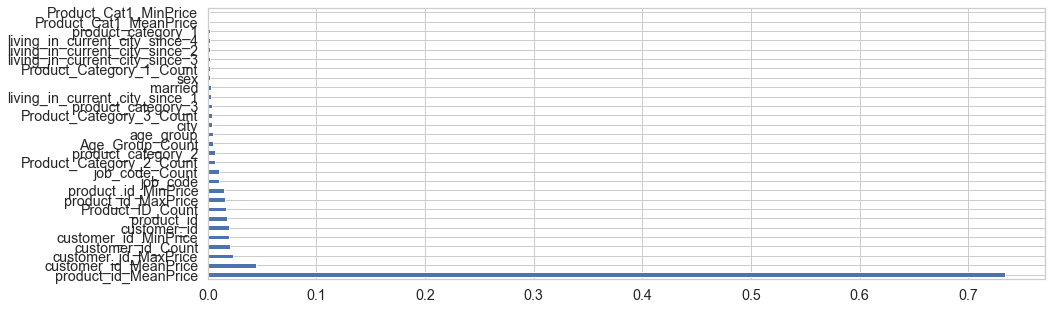

In [72]:
importance = Decision_model_4.feature_importances_
importance
(pd.Series(importance, index=X_train.columns)
   .nlargest(29)
   .plot(kind='barh'))  

In [73]:
## Further improvement in performance

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [75]:

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3395.8756127189636
R2 Score: 0.7376809666377364


## Some more features which could be created

(i) Age 26-35 is the most significant age group in the data set.. Also average purchase amount is differnt for married customers. Can these two features be combined

(ii) Dummeies from Product category 1 as this was the most significant feature in the original data

(ii) Convert the new  mean feature created after grouping based on customer id and total purchase amount in to categorical e.g. look at the quartile value and then define 10 category of customers


In [76]:
###################################################################
#######################################################################

In [77]:
#### Another Way to Create FEatures ###################333

We can create dummy for products i.e. for each product make it 1 if the user has bought it or 0 otherwise .

We can do this for some seleted number of products like top 100 products (by number of transactions).

Also we can select top categories like 18 categories in product_category_1

So we are going to find 100 most selling products and 18 categories (by number of transactions) 
For each user, put purchase amount of this product/product category as a new feature thus  adding totally 118 new features 


In [78]:
new_df=df.copy()

In [79]:
columns = ['product_id', 'product_category_1']
for column in columns:
    top_100 = df[column].value_counts().index[:100]    
    user_purchase = pd.pivot_table(
        df[['customer_id', column, 'Total_Purchase_Amount']],
        values='Total_Purchase_Amount',
        index='customer_id',
        columns=column,
        aggfunc=np.sum
    ).fillna(0)[top_100]  
    new_df = new_df.join(user_purchase)

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537577 entries, 0 to 537576
Columns: 133 entries, customer_id to 9
dtypes: float64(119), int32(2), int64(6), object(2), uint8(4)
memory usage: 551.1+ MB
